In [135]:
#importamos librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [136]:
#cargar archivo csv
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   description                                   26582 non-null  object 
 3   neighborhood_overview                         26582 non-null  object 
 4   picture_url                                   26582 non-null  object 
 5   host_name                                     26582 non-null  object 
 6   host_since                                    26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_response_rate                            26582 non-null  object 
 9   host_is_superhost                             26582 non-null 

In [138]:
#f1=df.iloc[ :  , [8,9,10,13,14,20,21,24,25,26,28,40,44,45,49] ]
f1=df

In [139]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   description                                   26582 non-null  object 
 3   neighborhood_overview                         26582 non-null  object 
 4   picture_url                                   26582 non-null  object 
 5   host_name                                     26582 non-null  object 
 6   host_since                                    26582 non-null  object 
 7   host_response_time                            26582 non-null  object 
 8   host_response_rate                            26582 non-null  object 
 9   host_is_superhost                             26582 non-null 

In [140]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
#f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
#f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
#frecuencias = f1['property_type'].value_counts()
#f1['property_type'] = f1['property_type'].map(frecuencias)
#print(f1[['property_type']])


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_8560\3867547137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})


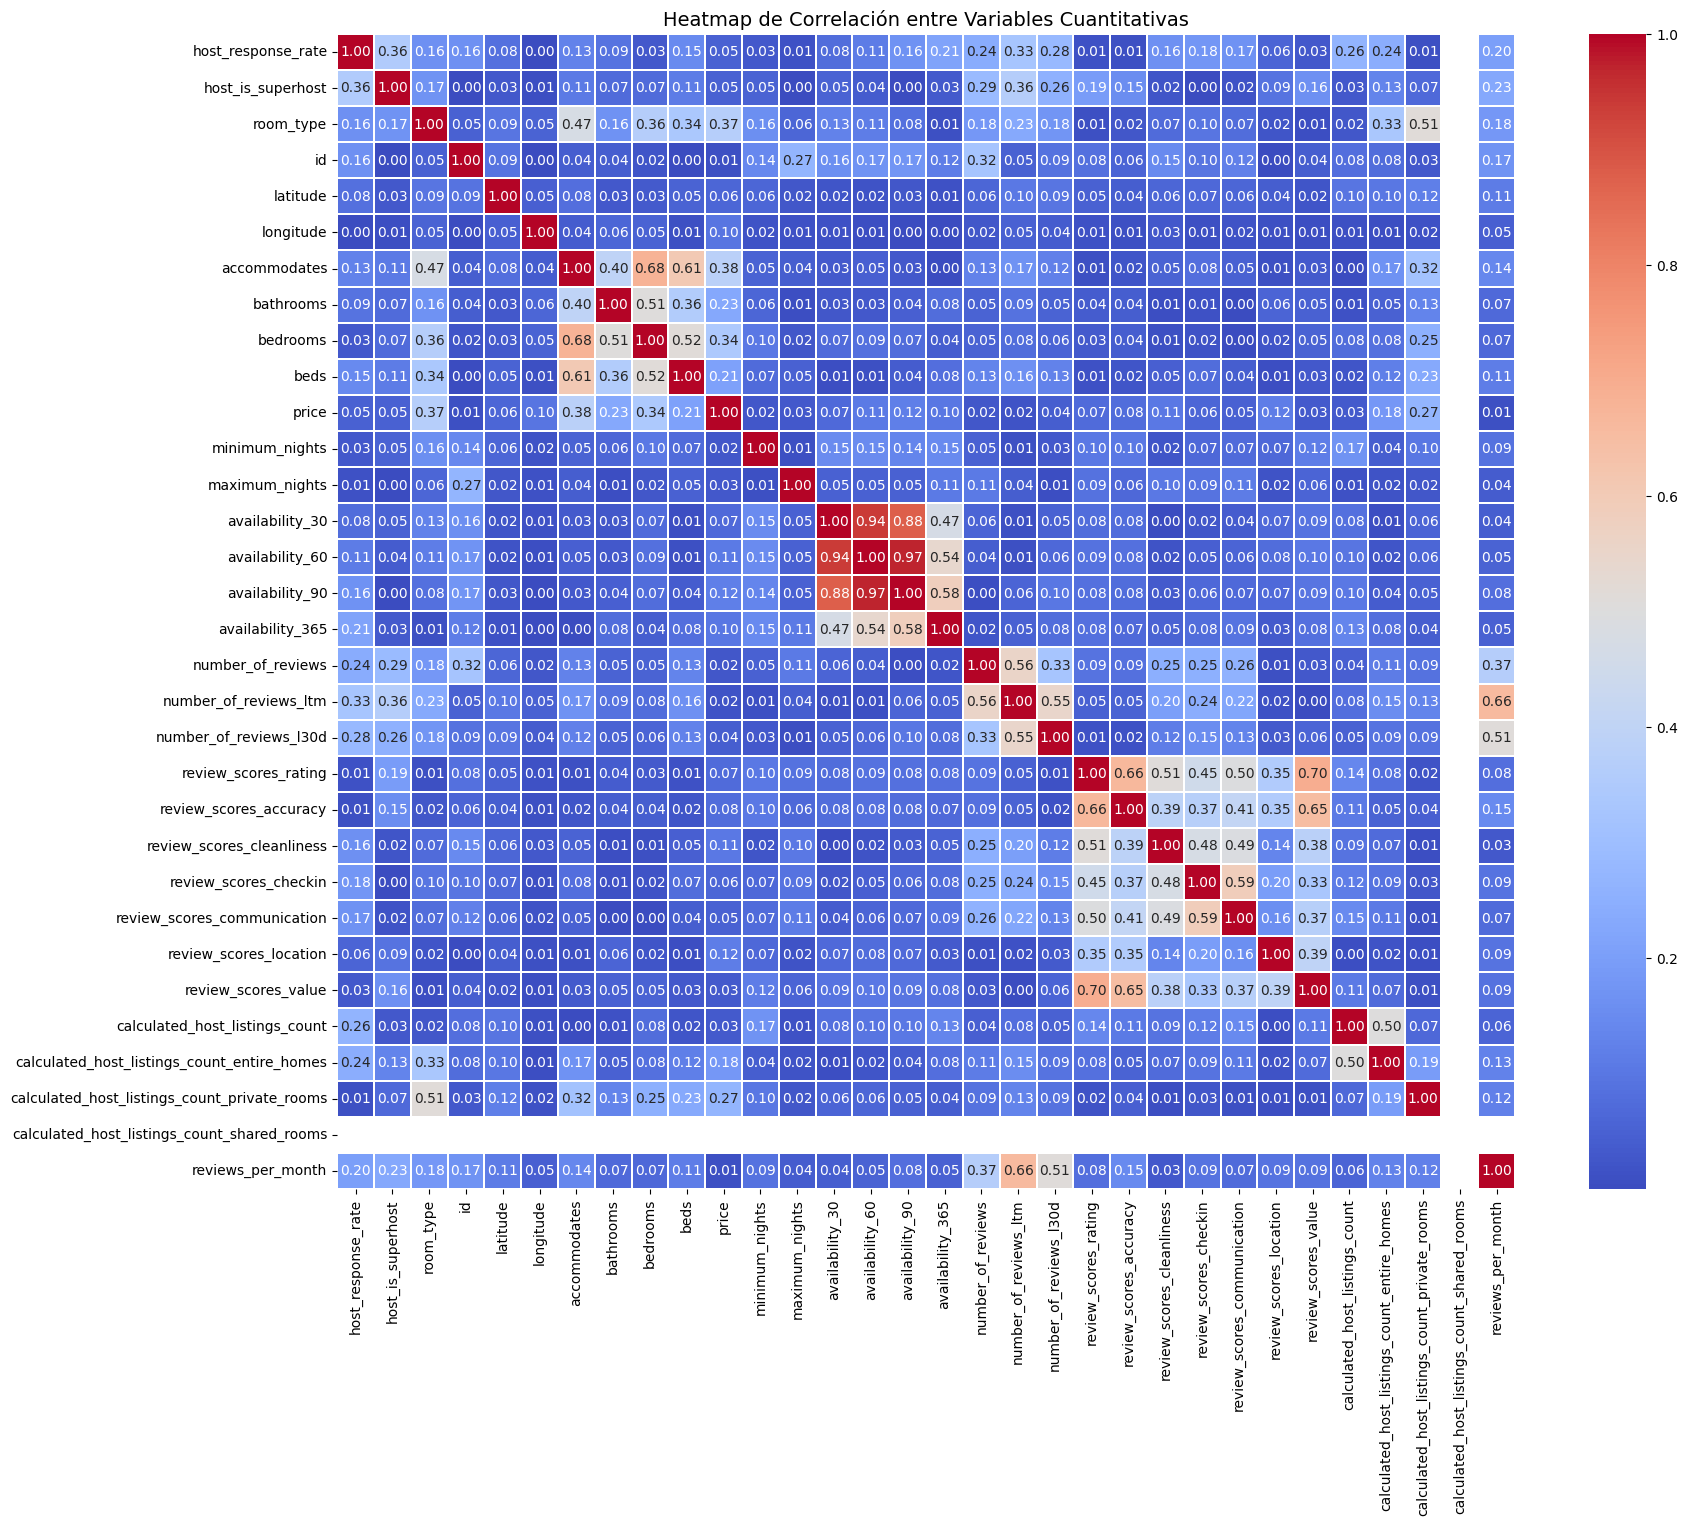

In [141]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

**Graficas**

<Axes: xlabel='number_of_reviews', ylabel='id'>

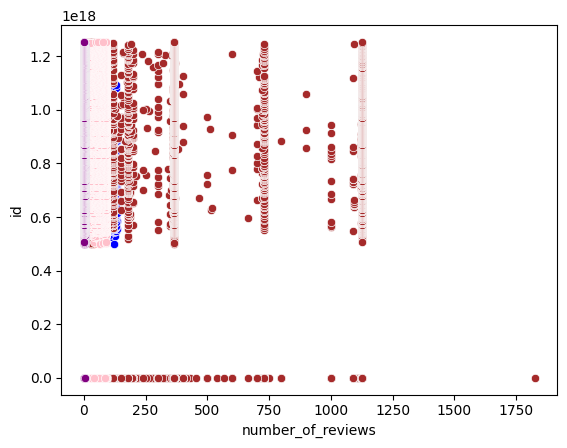

In [142]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='id', color="blue", data=f1)
sns.scatterplot(x='availability_60', y='id', color="red", data=f1)
sns.scatterplot(x='maximum_nights', y='id', color="brown", data=f1)
sns.scatterplot(x='availability_90', y='id', color="pink", data=f1)
sns.scatterplot(x='reviews_per_month', y='id', color="purple", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

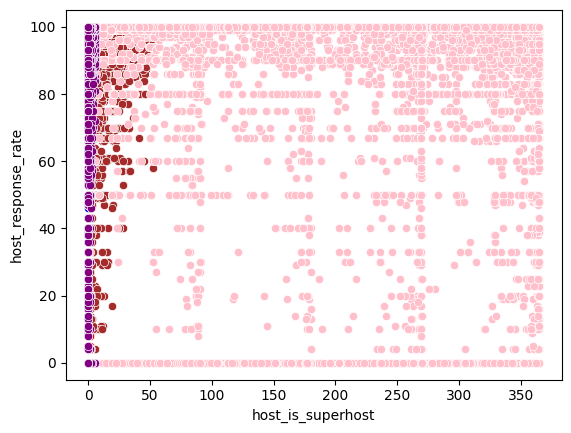

In [143]:
from turtle import color


sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_response_rate', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_response_rate', color="brown", data=f1)
sns.scatterplot(x='availability_365', y='host_response_rate', color="pink", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_response_rate', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

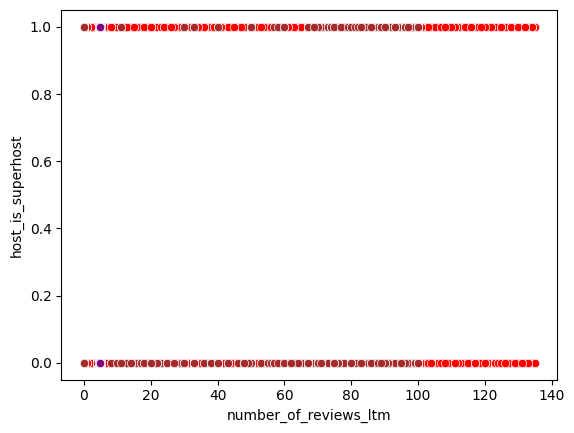

In [144]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="red", data=f1)
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="brown", data=f1)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="pink", data=f1)
sns.scatterplot(x='review_scores_value', y='host_is_superhost', color="purple", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

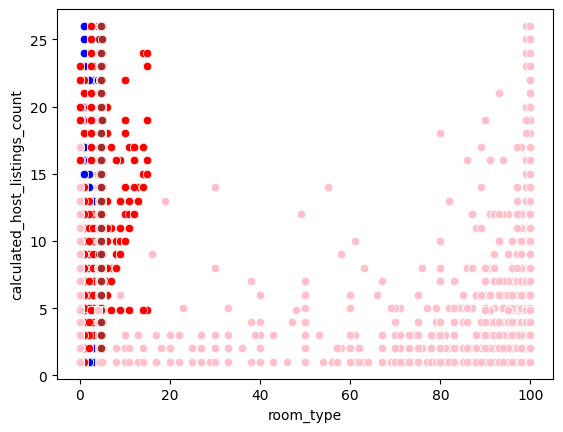

In [145]:
from turtle import color


sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="red", data=f1)
sns.scatterplot(x='review_scores_value', y='calculated_host_listings_count', color="brown", data=f1)
sns.scatterplot(x='host_response_rate', y='calculated_host_listings_count', color="pink", data=f1)


<Axes: xlabel='price', ylabel='room_type'>

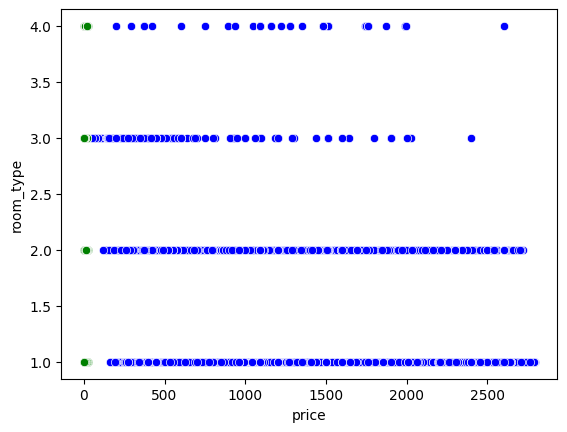

In [146]:
from turtle import color


sns.scatterplot(x='price', y='room_type', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='room_type', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='room_type', color="brown", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="pink", data=f1)
sns.scatterplot(x='beds', y='room_type', color="purple", data=f1)
sns.scatterplot(x='calculated_host_listings_count', y='room_type', color="green", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

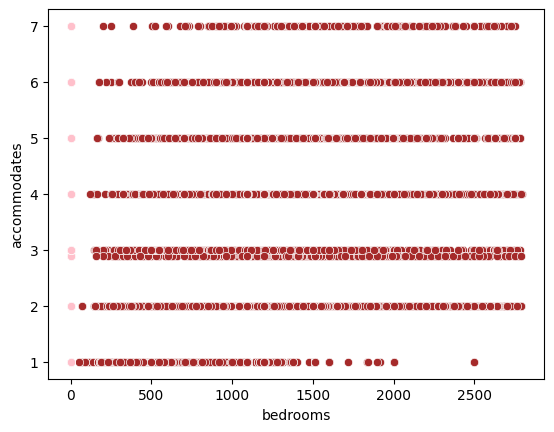

In [147]:
from turtle import color


sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='beds', y='accommodates', color="red", data=f1)
sns.scatterplot(x='price', y='accommodates', color="brown", data=f1)
sns.scatterplot(x='room_type', y='accommodates', color="pink", data=f1)

<Axes: xlabel='price', ylabel='bedrooms'>

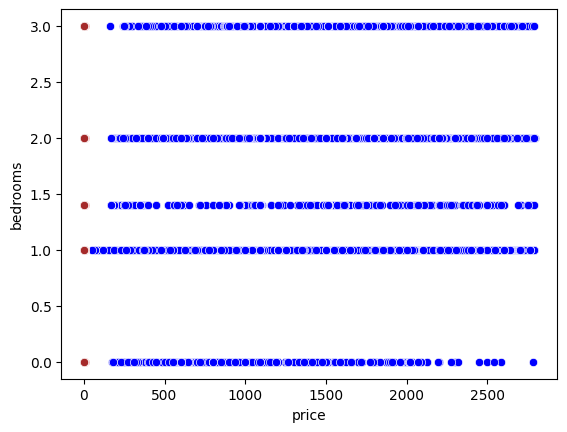

In [148]:
from turtle import color

sns.scatterplot(x='price', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=f1)
sns.scatterplot(x='beds', y='bedrooms', color="brown", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

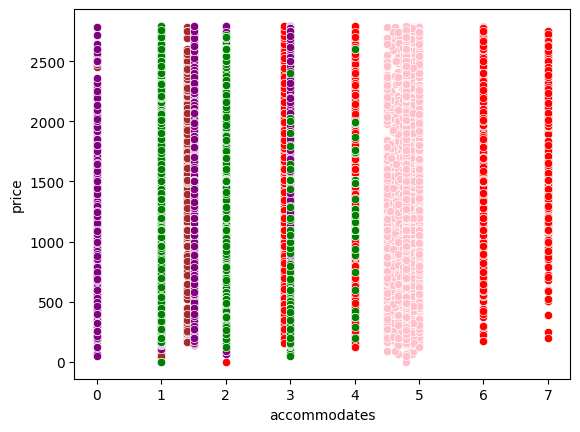

In [149]:
from turtle import color

sns.scatterplot(x='accommodates', y='price', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='price', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='price', color="pink", data=f1)
sns.scatterplot(x='beds', y='price', color="purple", data=f1)
sns.scatterplot(x='room_type', y='price', color="green", data=f1)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_value'>

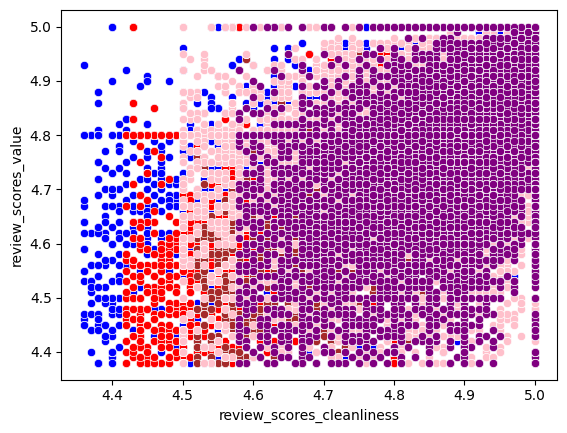

In [150]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="red", data=f1)
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='review_scores_value', color="pink", data=f1)
sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="purple", data=f1)


<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

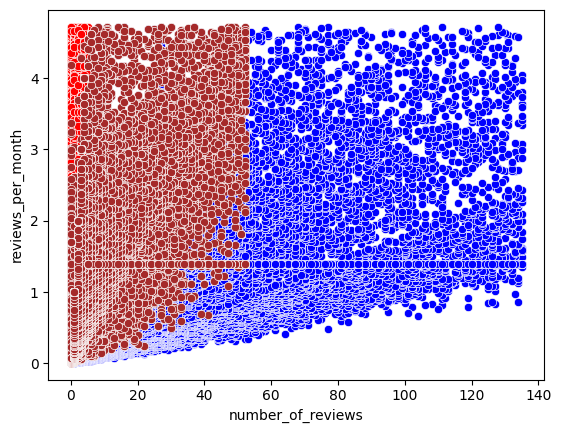

In [151]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="brown", data=f1)

**DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES**

In [152]:
#declaración de las variables independientes que se van a comparar con cada variable dependiente asignada 
Vars_Indep= f1[['number_of_reviews', 'availability_90', 'maximum_nights', 'availability_60', 'reviews_per_month']]
Vars_Indep2=f1[['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes', 'number_of_reviews_l30d', 'number_of_reviews', 'calculated_host_listings_count']]
Vars_Indep3=f1[['number_of_reviews_ltm','number_of_reviews','host_response_rate','review_scores_rating', 'reviews_per_month', 'number_of_reviews_l30d']]
Vars_Indep4=f1[['minimum_nights','calculated_host_listings_count_entire_homes', 'host_response_rate']]
Vars_Indep5=f1[['price', 'accommodates', 'bedrooms', 'calculated_host_listings_count_entire_homes', 'beds', 'calculated_host_listings_count_private_rooms']]
Vars_Indep6=f1[['bedrooms', 'beds', 'bathrooms', 'price', 'room_type']]
Vars_Indep7=f1[['accommodates','bathrooms','beds', 'price', 'room_type']]
Vars_Indep8=f1[['accommodates', 'bedrooms', 'beds', 'room_type']]
Vars_Indep9=f1[['review_scores_cleanliness', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_location', 'review_scores_communication']]
Vars_Indep10=f1[['number_of_reviews','number_of_reviews_l30d', 'number_of_reviews_ltm']]


In [153]:
#Declaración de variables dependientes
Var_Dep= f1['id']
Var_Dep2= f1['host_response_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [154]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [155]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [156]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [157]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'availability_90', 'maximum_nights',
        'availability_60', 'reviews_per_month'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-6.43284716e+15,  3.87746606e+15, -2.38255541e+14, -2.68894031e+15,
         1.35132497e+17]),
 'rank_': 5,
 'singular_': array([68902.89230435,  6228.52355854,  5085.82083544,   685.44564084,
          162.07893604]),
 'intercept_': np.float64(5.128091344571356e+17)}

In [158]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2614491174370964

In [159]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm',
        'calculated_host_listings_count_entire_homes',
        'number_of_reviews_l30d', 'number_of_reviews',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([19.19491235, -1.99808514,  0.40652852,  0.89814206,  3.98548109,
         0.05726857,  1.45929848]),
 'rank_': 7,
 'singular_': array([5267.05716036, 1712.68621249,  878.91326109,  424.93796889,
         178.69864091,  124.19693502,   72.93296502]),
 'intercept_': np.float64(57.56157426364862)}

In [160]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2.score(Vars_Indep2,Var_Dep2)

0.24582957243043713

In [161]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews', 'host_response_rate',
        'review_scores_rating', 'reviews_per_month',
        'number_of_reviews_l30d'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([ 0.00805259,  0.00184594,  0.00331065,  0.79265593, -0.00298758,
         0.01129596]),
 'rank_': 6,
 'singular_': array([6460.32030994, 4782.46165348, 1665.49286746,  177.56530362,
         123.7579408 ,   21.40456969]),
 'intercept_': np.float64(-3.850176055253692)}

In [162]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3.score(Vars_Indep3,Var_Dep3)

0.2492836504476209

In [163]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['minimum_nights', 'calculated_host_listings_count_entire_homes',
        'host_response_rate'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.13767167,  0.72274168,  0.01996074]),
 'rank_': 3,
 'singular_': array([6061.07627839,  512.88780385,  106.76668394]),
 'intercept_': np.float64(3.2719352047079746)}

In [164]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.29573329961458794

In [165]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price', 'accommodates', 'bedrooms',
        'calculated_host_listings_count_entire_homes', 'beds',
        'calculated_host_listings_count_private_rooms'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-1.32038297e-04, -8.40108282e-02, -2.92712235e-02, -3.26446661e-02,
        -4.12403757e-02,  1.58178533e-01]),
 'rank_': 6,
 'singular_': array([8.83586853e+04, 5.21770396e+02, 2.43911214e+02, 1.73041741e+02,
        8.56440273e+01, 7.12381751e+01]),
 'intercept_': np.float64(1.8289442452042266)}

In [166]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5.score(Vars_Indep5,Var_Dep5)

0.42958224017350577

In [167]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'bathrooms', 'price', 'room_type'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 9.17557542e-01,  6.31133799e-01,  6.99034870e-02,  2.84256535e-04,
        -4.71591379e-01]),
 'rank_': 5,
 'singular_': array([8.83585798e+04, 1.39438270e+02, 8.31996699e+01, 7.53522075e+01,
        6.45273756e+01]),
 'intercept_': np.float64(0.9520480962220921)}

In [168]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.598095333668417

In [169]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bathrooms', 'beds', 'price', 'room_type'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 2.08455444e-01,  3.01576368e-01,  1.06607636e-01,  7.92996776e-05,
        -4.41512107e-02]),
 'rank_': 5,
 'singular_': array([8.83586181e+04, 2.32549583e+02, 8.81636594e+01, 7.98054085e+01,
        7.23295761e+01]),
 'intercept_': np.float64(0.2124977773669896)}

In [170]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.5435519520035783

In [171]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'beds', 'room_type'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([  81.11204674,  124.33541366,  -61.38541528, -241.99202648]),
 'rank_': 4,
 'singular_': array([260.93174423,  85.86792962,  76.161412  ,  71.8417998 ]),
 'intercept_': np.float64(1103.267264679145)}

In [172]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.20569975499624937

In [173]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_location',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.02056691,  0.47862592,  0.39659693,  0.16020012, -0.00280563]),
 'rank_': 5,
 'singular_': array([33.05546803, 19.73584594, 15.28063173, 12.2690076 , 11.07093029]),
 'intercept_': np.float64(-0.3163714156931201)}

In [174]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model9.score(Vars_Indep9,Var_Dep9)

0.5636820675031402

In [175]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'number_of_reviews_l30d',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.00034491,  0.17922565,  0.04553039]),
 'rank_': 3,
 'singular_': array([5265.95751701, 1708.03116194,  173.22147592]),
 'intercept_': np.float64(0.7983026509553368)}

In [176]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model10.score(Vars_Indep10,Var_Dep10)

0.4666706867810708

In [177]:
#Predecimos los valores a partir de las variables independientes 
y_pred= model.predict(X=Vars_Indep)
y_pred

array([9.26125065e+17, 2.14396567e+17, 3.72437528e+17, ...,
       6.55571106e+17, 6.55571106e+17, 8.28944324e+17], shape=(26582,))

In [178]:
#Predecimos los valores a partir de las variables independientes 
y_pred2= model2.predict(X=Vars_Indep2)
y_pred2

array([56.52227006, 94.86941643, 85.28423546, ..., 84.69874169,
       84.69874169, 82.78950404], shape=(26582,))

In [179]:
#Predecimos los valores a partir de las variables independientes 
y_pred3= model3.predict(X=Vars_Indep3)
y_pred3

array([-0.05050649,  0.22816805,  0.3906292 , ...,  0.28055852,
        0.28055852,  0.28055852], shape=(26582,))

In [180]:
#Predecimos los valores a partir de las variables independientes 
y_pred4= model4.predict(X=Vars_Indep4)
y_pred4

array([2.85700522, 7.02130462, 3.85928802, ..., 9.91227136, 9.91227136,
       7.02130462], shape=(26582,))

In [181]:
#Predecimos los valores a partir de las variables independientes 
y_pred5= model5.predict(X=Vars_Indep5)
y_pred5

array([1.41343526, 1.33110353, 1.0186827 , ..., 1.08347523, 1.09667906,
       1.28118451], shape=(26582,))

In [182]:
#Predecimos los valores a partir de las variables independientes 
y_pred6= model6.predict(X=Vars_Indep6)
y_pred6

array([2.40977236, 2.89575674, 4.2244994 , ..., 2.39495281, 2.36652716,
       2.48365064], shape=(26582,))

In [183]:
#Predecimos los valores a partir de las variables independientes 
y_pred7= model7.predict(X=Vars_Indep7)
y_pred7

array([1.08012394, 1.30092075, 1.67785903, ..., 1.16339938, 1.15546941,
       1.10073392], shape=(26582,))

In [184]:
#Predecimos los valores a partir de las variables independientes 
y_pred8= model8.predict(X=Vars_Indep8)
y_pred8

array([1086.44933006, 1209.1843376 , 1311.62342193, ...,  844.45730358,
        844.45730358, 1086.44933006], shape=(26582,))

In [185]:
#Predecimos los valores a partir de las variables independientes 
y_pred9= model9.predict(X=Vars_Indep9)
y_pred9

array([4.74246525, 4.56526747, 4.81821255, ..., 4.74246525, 4.74246525,
       4.74246525], shape=(26582,))

In [186]:
#Predecimos los valores a partir de las variables independientes 
y_pred10= model10.predict(X=Vars_Indep10)
y_pred10

array([0.79830265, 0.77622863, 0.96352378, ..., 0.79830265, 0.79830265,
       0.79830265], shape=(26582,))

In [187]:
#Insertamos la columna de predicciones en el DataFrame
f1.insert(0, 'Pred_id', y_pred)
f1.insert(1, 'Pred_hrr', y_pred2)
f1.insert(2, 'Pred_his', y_pred3)
f1.insert(3, 'Pred_chl', y_pred4)
f1.insert(4, 'Pred_room', y_pred5)
f1.insert(5, 'Pred_accommodates', y_pred6)
f1.insert(6, 'Pred_bedrooms', y_pred7)
f1.insert(7, 'Pred_price', y_pred8)
f1.insert(8, 'Pred_rsv', y_pred9)
f1.insert(9, 'Pred_rpm', y_pred10)
f1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.261251e+17,56.522270,-0.050506,2.857005,1.413435,2.409772,1.080124,1086.449330,4.742465,0.798303,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,2.143966e+17,94.869416,0.228168,7.021305,1.331104,2.895757,1.300921,1209.184338,4.565267,0.776229,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,3.724375e+17,85.284235,0.390629,3.859288,1.018683,4.224499,1.677859,1311.623422,4.818213,0.963524,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,-8.647430e+16,99.362026,0.683744,4.893218,1.532777,2.423104,1.083843,1086.449330,4.859639,1.431664,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,4.232980e+17,84.238973,0.392806,6.298563,1.348146,2.444724,1.230912,1086.449330,4.892813,0.794509,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,9.194484e+17,93.084293,0.280559,14.248721,0.941143,3.314869,1.511507,1069.631395,4.742465,0.798303,...,5.00,5.00,5.00,4.80,4.70,4.9,14.0,0.7,0.0,1.70
26578,6.555711e+17,84.698742,0.280559,9.912271,1.295648,1.938181,1.035973,844.457304,4.742465,0.798303,...,5.00,5.00,5.00,4.80,4.70,16.0,8.0,0.7,0.0,1.70
26579,6.555711e+17,84.698742,0.280559,9.912271,1.083475,2.394953,1.163399,844.457304,4.742465,0.798303,...,5.00,5.00,5.00,4.80,4.70,16.0,8.0,0.7,0.0,1.70
26580,6.555711e+17,84.698742,0.280559,9.912271,1.096679,2.366527,1.155469,844.457304,4.742465,0.798303,...,5.00,5.00,5.00,4.80,4.70,16.0,8.0,0.7,0.0,1.70


**GRÁFICAS PREDICCIONES**

<Axes: xlabel='number_of_reviews', ylabel='id'>

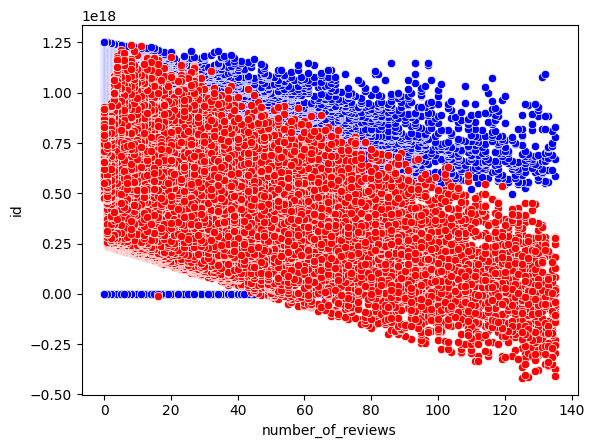

In [188]:
#Visualizamos la gráfica comparativa entre el id con number of reviews y el predicido

sns.scatterplot(x='number_of_reviews', y='id', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='Pred_id', color="red", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

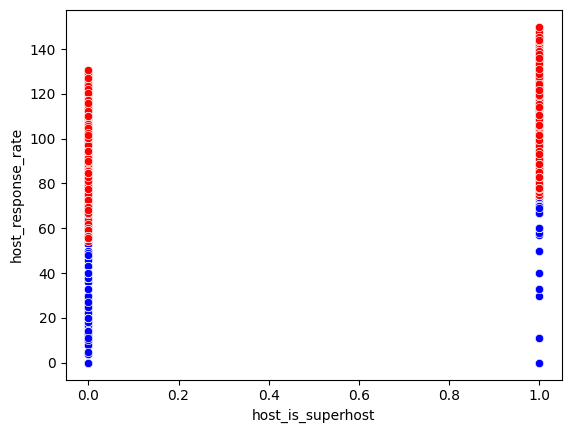

In [189]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='host_is_superhost', y='Pred_hrr', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

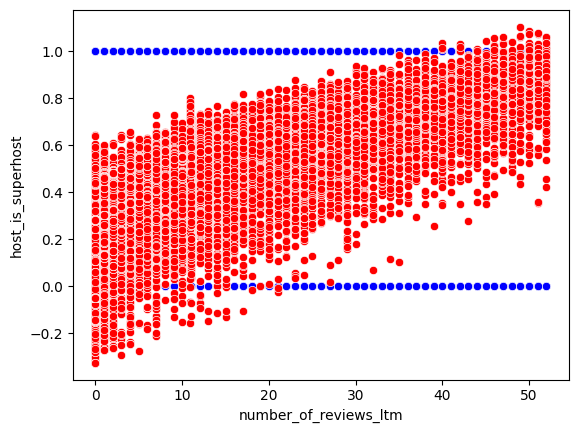

In [190]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_his', color="red", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

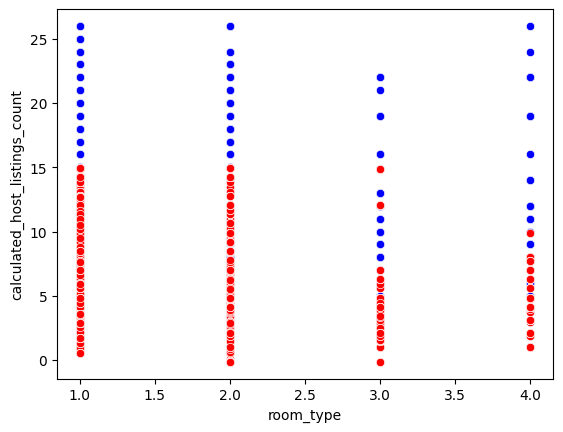

In [191]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='room_type', y='Pred_chl', color="red", data=f1)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='room_type'>

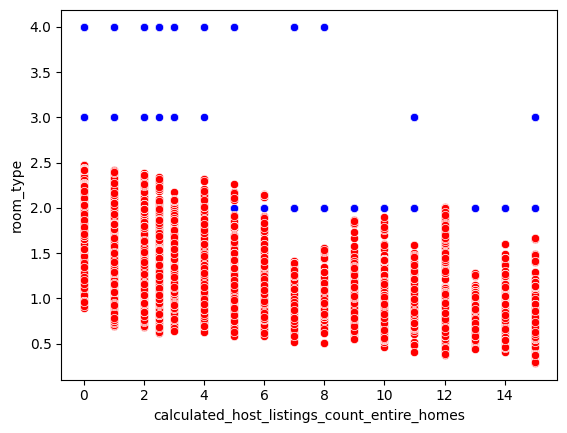

In [192]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_room', color="red", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

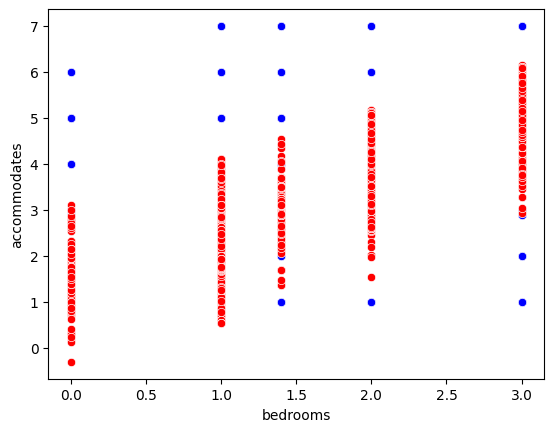

In [193]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='bedrooms', y='Pred_accommodates', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

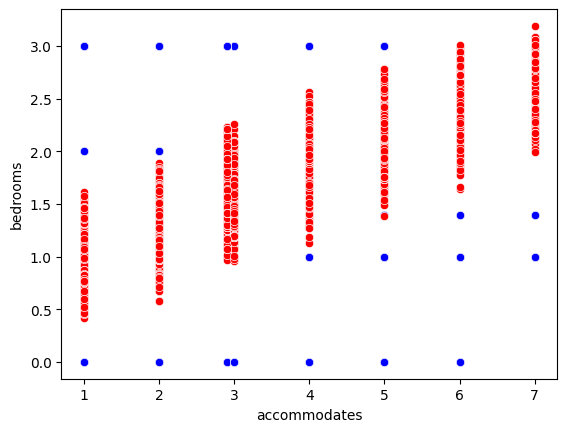

In [194]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_bedrooms', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

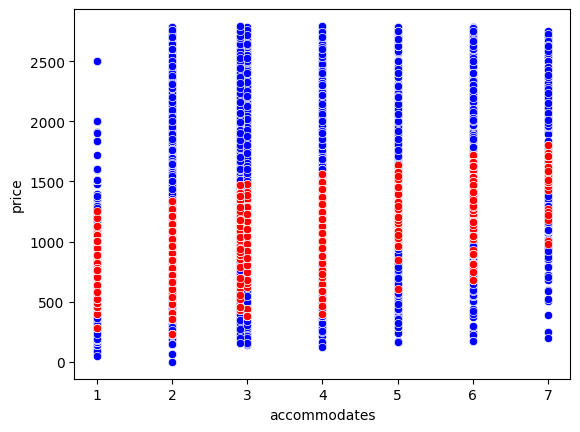

In [195]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='price', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_price', color="red", data=f1)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

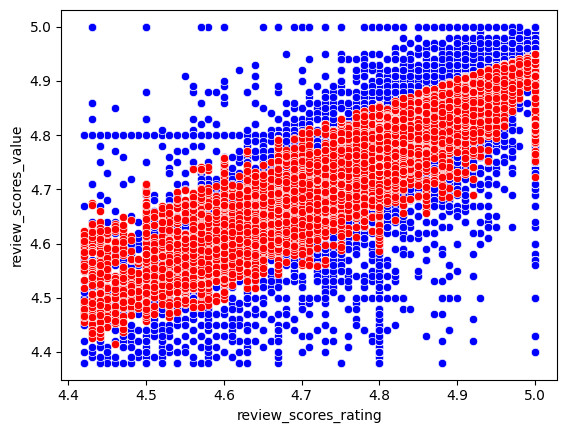

In [196]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='Pred_rsv', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

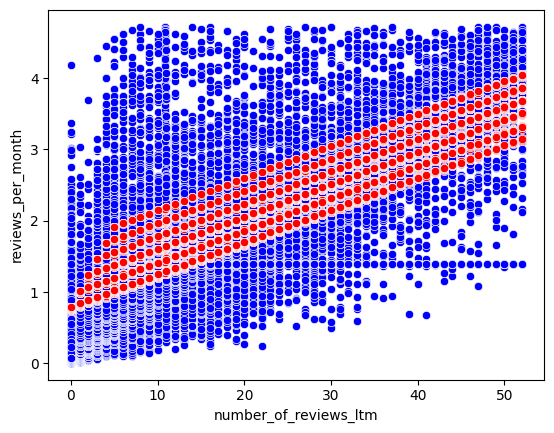

In [197]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rpm', color="red", data=f1)

**DETERMINAMOS COEFICIENTES DE DETERMINACIÓN**

In [198]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2614491174370964

In [199]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.24582957243043713

In [200]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.2492836504476209

In [201]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.29573329961458794

In [202]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.42958224017350577

In [203]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.598095333668417

In [204]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.5435519520035783

In [205]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.20569975499624937

In [206]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.5636820675031402

In [207]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.4666706867810708

**COEFICIENTES DE CORRELACION**

In [208]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.5113209534500776)

In [209]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.49581203336590884)

In [210]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.4992831365544213)

In [211]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.5438136625854374)

In [212]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.655425236143304)

In [213]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.7733662351489216)

In [214]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.7372597588391613)

In [215]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.4535413487172359)

In [216]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.750787631426584)

In [217]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.6831329934800916)

In [218]:
f2=f1.iloc[ :  , [0,1,2,3,4,5,6,7,8,9,18,19,24,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59] ]

In [219]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Pred_id,1.000000,-0.137314,-0.170000,0.017944,0.037510,-0.054753,-0.035967,-0.064984,0.015082,-0.015397,...,0.212303,0.166757,0.188785,-0.070302,-0.026852,0.020242,-0.008295,0.020430,NaN,0.329346
Pred_hrr,-0.137314,1.000000,0.684487,0.561486,-0.275485,0.150953,0.169211,0.195174,0.028881,0.697436,...,-0.148416,-0.187377,-0.183985,0.072608,0.049804,0.530384,0.492186,-0.094281,NaN,0.406795
Pred_his,-0.170000,0.684487,1.000000,0.334236,-0.180764,0.169046,0.190587,0.197271,0.360308,0.737891,...,-0.013567,-0.069143,-0.033961,0.194196,0.312218,0.120000,0.182934,-0.092835,NaN,0.455680
Pred_chl,0.017944,0.561486,0.334236,1.000000,-0.445926,0.159476,0.164381,0.222051,-0.089585,0.221963,...,-0.110431,-0.142818,-0.157224,0.013277,-0.083646,0.543814,0.925573,-0.140255,NaN,0.184819
Pred_room,0.037510,-0.275485,-0.180764,-0.445926,1.000000,-0.735891,-0.732858,-0.782646,-0.021966,-0.184788,...,0.018438,0.063008,0.049196,-0.035463,-0.006071,-0.115347,-0.509983,0.783333,NaN,-0.166205
Pred_accommodates,-0.054753,0.150953,0.169046,0.159476,-0.735891,1.000000,0.865660,0.843915,0.042624,0.161278,...,-0.024751,-0.052266,-0.026552,0.032409,0.043571,-0.049071,0.194334,-0.384134,NaN,0.124751
Pred_bedrooms,-0.035967,0.169211,0.190587,0.164381,-0.732858,0.865660,1.000000,0.820290,0.037228,0.173129,...,-0.035841,-0.065896,-0.038256,0.036437,0.043473,0.000915,0.174521,-0.332046,NaN,0.140313
Pred_price,-0.064984,0.195174,0.197271,0.222051,-0.782646,0.843915,0.820290,1.000000,0.020697,0.204723,...,-0.057228,-0.081202,-0.055916,0.024096,0.023309,-0.035737,0.262922,-0.465291,NaN,0.165159
Pred_rsv,0.015082,0.028881,0.360308,-0.089585,-0.021966,0.042624,0.037228,0.020697,1.000000,-0.035647,...,0.507397,0.461159,0.494622,0.525921,0.750788,-0.127459,-0.069913,-0.029209,NaN,-0.121382
Pred_rpm,-0.015397,0.697436,0.737891,0.221963,-0.184788,0.161278,0.173129,0.204723,-0.035647,1.000000,...,-0.194145,-0.240770,-0.213815,0.023085,0.016310,0.078125,0.150956,-0.130536,NaN,0.683133


In [220]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Pred_id,1.000000,0.137314,0.170000,0.017944,0.037510,0.054753,0.035967,0.064984,0.015082,0.015397,...,0.212303,0.166757,0.188785,0.070302,0.026852,0.020242,0.008295,0.020430,NaN,0.329346
Pred_hrr,0.137314,1.000000,0.684487,0.561486,0.275485,0.150953,0.169211,0.195174,0.028881,0.697436,...,0.148416,0.187377,0.183985,0.072608,0.049804,0.530384,0.492186,0.094281,NaN,0.406795
Pred_his,0.170000,0.684487,1.000000,0.334236,0.180764,0.169046,0.190587,0.197271,0.360308,0.737891,...,0.013567,0.069143,0.033961,0.194196,0.312218,0.120000,0.182934,0.092835,NaN,0.455680
Pred_chl,0.017944,0.561486,0.334236,1.000000,0.445926,0.159476,0.164381,0.222051,0.089585,0.221963,...,0.110431,0.142818,0.157224,0.013277,0.083646,0.543814,0.925573,0.140255,NaN,0.184819
Pred_room,0.037510,0.275485,0.180764,0.445926,1.000000,0.735891,0.732858,0.782646,0.021966,0.184788,...,0.018438,0.063008,0.049196,0.035463,0.006071,0.115347,0.509983,0.783333,NaN,0.166205
Pred_accommodates,0.054753,0.150953,0.169046,0.159476,0.735891,1.000000,0.865660,0.843915,0.042624,0.161278,...,0.024751,0.052266,0.026552,0.032409,0.043571,0.049071,0.194334,0.384134,NaN,0.124751
Pred_bedrooms,0.035967,0.169211,0.190587,0.164381,0.732858,0.865660,1.000000,0.820290,0.037228,0.173129,...,0.035841,0.065896,0.038256,0.036437,0.043473,0.000915,0.174521,0.332046,NaN,0.140313
Pred_price,0.064984,0.195174,0.197271,0.222051,0.782646,0.843915,0.820290,1.000000,0.020697,0.204723,...,0.057228,0.081202,0.055916,0.024096,0.023309,0.035737,0.262922,0.465291,NaN,0.165159
Pred_rsv,0.015082,0.028881,0.360308,0.089585,0.021966,0.042624,0.037228,0.020697,1.000000,0.035647,...,0.507397,0.461159,0.494622,0.525921,0.750788,0.127459,0.069913,0.029209,NaN,0.121382
Pred_rpm,0.015397,0.697436,0.737891,0.221963,0.184788,0.161278,0.173129,0.204723,0.035647,1.000000,...,0.194145,0.240770,0.213815,0.023085,0.016310,0.078125,0.150956,0.130536,NaN,0.683133


<Axes: >

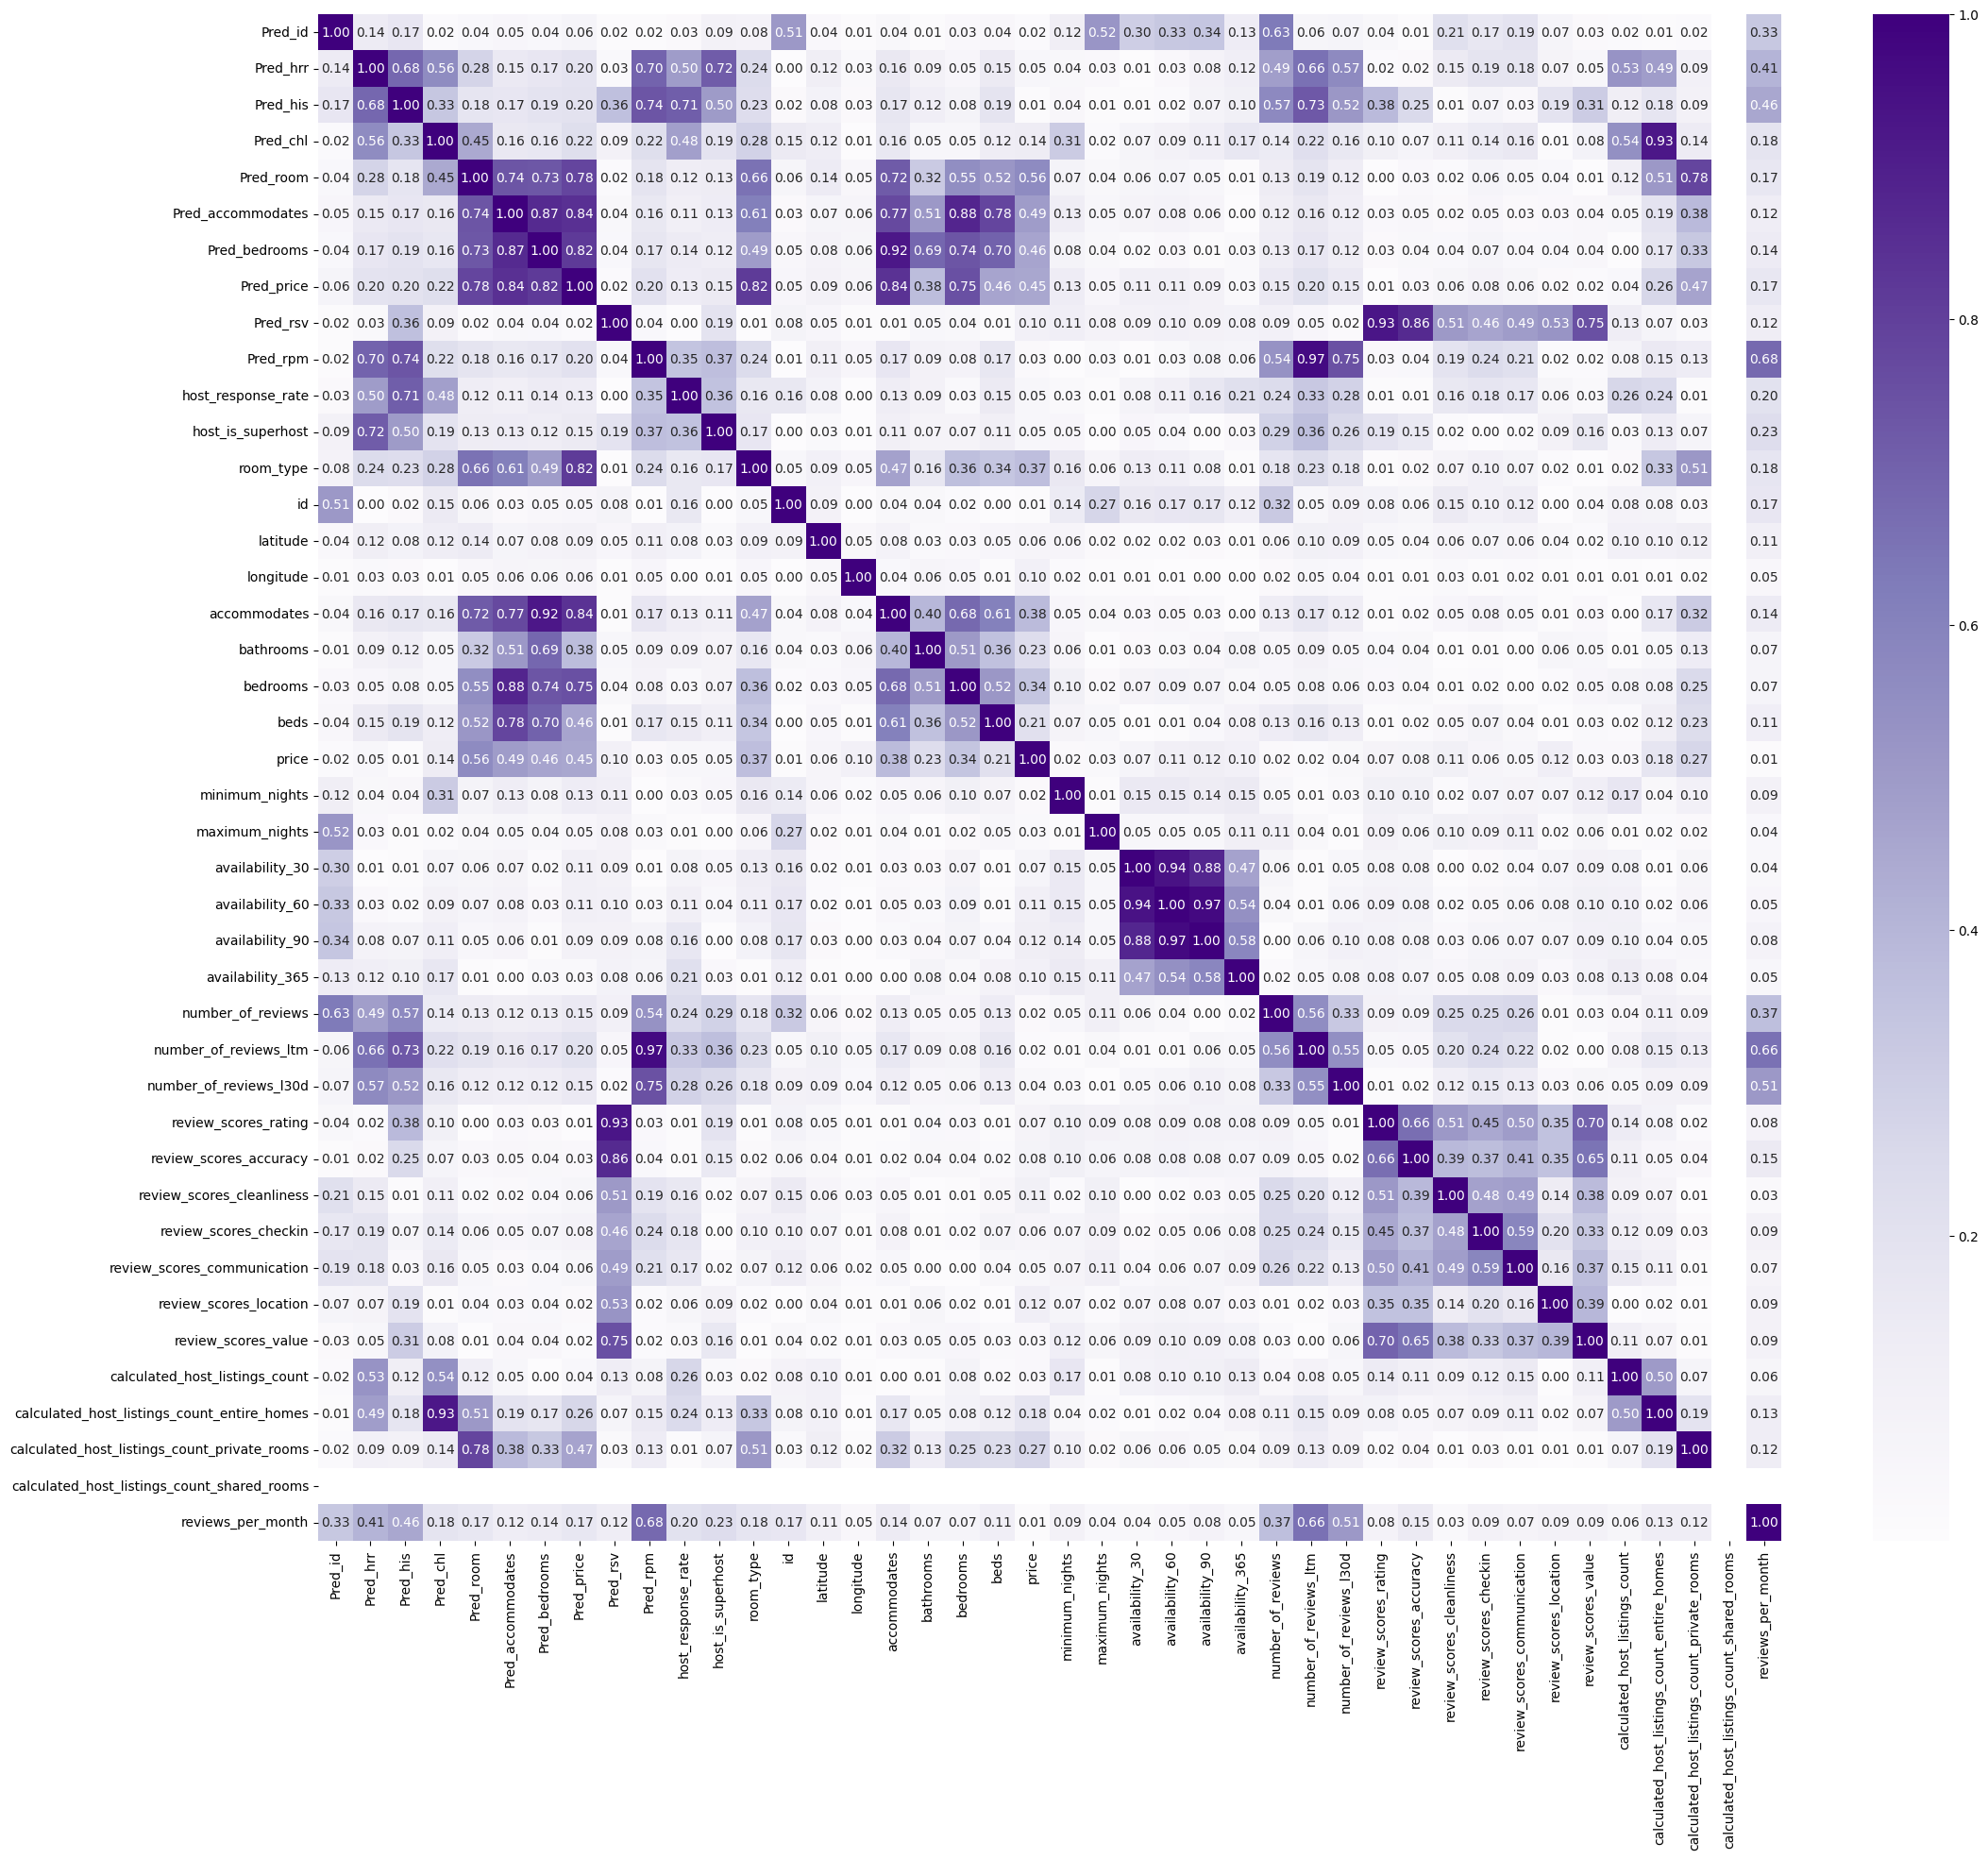

In [221]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(25,21))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap